In [53]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Number of customer responses
num_customers = 200

# Create a DataFrame with random ratings for each criterion
data = {
  'Качество продукции': np.random.randint(1, 6, size=num_customers),
  'Сроки поставки': np.random.randint(1, 6, size=num_customers),
  'Стоимость продукции': np.random.randint(1, 6, size=num_customers),
  'Доброжелательность сотрудников': np.random.randint(1, 6, size=num_customers),
  'Гарантийное обслуживание': np.random.randint(1, 6, size=num_customers)
}

# Create a DataFrame
customer_responses = pd.DataFrame(data)

# Add customer IDs
customer_responses.index = ['Клиент_' + str(i+1) for i in range(num_customers)]
customer_responses.index.name = 'ID'

# Display the first few rows
customer_responses.head()

,Качество продукции,Сроки поставки,Стоимость продукции,Доброжелательность сотрудников,Гарантийное обслуживание
ID,,,,,
Клиент_1,4,2,3,3,3
Клиент_2,5,3,5,4,3
Клиент_3,3,1,1,5,4
Клиент_4,5,1,5,4,5
Клиент_5,5,4,4,3,2


In [54]:

# Create a DataFrame for importance of each criterion
# TODO: remove custom probabilities
importance_data = {
  'Важность_Качество': np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.05, 0.1, 0.15, 0.3, 0.4]),
  'Важность_Сроки': np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.1, 0.15, 0.25, 0.3, 0.2]),
  'Важность_Стоимость': np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.05, 0.1, 0.2, 0.35, 0.3]), 
  'Важность_Доброжелательность': np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.15, 0.25, 0.3, 0.2, 0.1]),
  'Важность_Гарантия': np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.1, 0.15, 0.2, 0.25, 0.3])
}

# Create DataFrame for importance ratings
importance_ratings = pd.DataFrame(importance_data, index=customer_responses.index)

# Calculate average importance for each criterion
avg_importance = importance_ratings.mean().sort_values(ascending=False)

importance_ratings.head()

,Важность_Качество,Важность_Сроки,Важность_Стоимость,Важность_Доброжелательность,Важность_Гарантия
ID,,,,,
Клиент_1,5,5,5,3,3
Клиент_2,4,2,5,2,1
Клиент_3,5,5,5,3,1
Клиент_4,5,3,2,4,5
Клиент_5,5,2,5,2,2


In [55]:
rating_means = customer_responses.mean().sort_values(ascending=False)
# print("Математическое ожидание для параметров рейтинга:")
# for criterion, mean_value in rating_means.items():
#   print(f"{criterion}: {mean_value:.2f}")


# print("Стандартное отклонение для параметров рейтинга:")
rating_std = customer_responses.std().sort_values(ascending=False)
# for criterion, std_value in rating_std.items():
#   print(f"{criterion}: {std_value:.2f}")


criterion_mean = importance_ratings.mean().sort_values(ascending=False)
# print("Математическое ожидание для параметров важности:")
# for criterion, mean_value in criterion_mean.items():
#   print(f"{criterion}: {mean_value:.2f}")

# print("Стандартное отклонение для параметров важности:")
criterion_std = importance_ratings.std().sort_values(ascending=False)
# for criterion, std_value in criterion_std.items():
#   print(f"{criterion}: {std_value:.2f}")


# Create DataFrame with all statistics
stats_data = {
  'Параметр': list(rating_means.index) + list(criterion_mean.index),
  'Среднее значение': list(rating_means.values) + list(criterion_mean.values),
  'Стандартное отклонение': list(rating_std.values) + list(criterion_std.values),
  'Тип': ['Рейтинг']*len(rating_means) + ['Важность']*len(criterion_mean)
}

stats_df = pd.DataFrame(stats_data)

# Format the numeric columns to 2 decimal places
stats_df['Среднее значение'] = stats_df['Среднее значение'].round(2)
stats_df['Стандартное отклонение'] = stats_df['Стандартное отклонение'].round(2)

# Display the DataFrame sorted by type and mean value (descending)
stats_df.sort_values(['Тип', 'Среднее значение'], ascending=[True, False])


,Параметр,Среднее значение,Стандартное отклонение,Тип
5,Важность_Качество,3.75,1.35,Важность
6,Важность_Стоимость,3.73,1.30,Важность
7,Важность_Сроки,3.50,1.21,Важность
8,Важность_Гарантия,3.44,1.16,Важность
9,Важность_Доброжелательность,2.84,1.16,Важность
0,Стоимость продукции,3.14,1.48,Рейтинг
1,Гарантийное обслуживание,3.02,1.45,Рейтинг
2,Качество продукции,3.00,1.42,Рейтинг
3,Доброжелательность сотрудников,2.94,1.41,Рейтинг
4,Сроки поставки,2.92,1.41,Рейтинг


In [56]:
# Create a dictionary to store all the statistics
stats_dict = {
  'Сумма': customer_responses.sum(axis=0),
  'Максимум': customer_responses.max(axis=0),
  'Минимум': customer_responses.min(axis=0),
  'Среднее': customer_responses.mean(axis=0),
  'Стд. отклонение': customer_responses.std(axis=0),
}

# Map importance ratings to their corresponding criteria
importance_map = {
  'Качество продукции': 'Важность_Качество',
  'Сроки поставки': 'Важность_Сроки',
  'Стоимость продукции': 'Важность_Стоимость',
  'Доброжелательность сотрудников': 'Важность_Доброжелательность',
  'Гарантийное обслуживание': 'Важность_Гарантия'
}

# Calculate weighted scores
weighted_scores = {}
for criterion, importance in importance_map.items():
  # Calculate weighted score by multiplying average rating by average importance
  avg_rating = customer_responses[criterion].mean()
  avg_importance = importance_ratings[importance].mean()
  
  # Calculate normalized weight coefficient (importance relative to sum of all importances)
  total_importance = sum(importance_ratings.mean())
  weight_coefficient = avg_importance / total_importance
  
  # Calculate weighted score using the weight coefficient
  weighted_score = avg_rating * weight_coefficient * 5 
  weighted_scores[criterion] = weighted_score

stats_dict['Взвешенная оценка'] = pd.Series(weighted_scores)

# Create the final dataframe with all statistics
statistics_df = pd.DataFrame(stats_dict)

# Calculate average of averages
avg_of_avgs = statistics_df['Среднее'].mean()
print(f"Среднее значение всех средних оценок: {avg_of_avgs:.2f}")

# Sort by weighted score to show which criteria perform best
statistics_df = statistics_df.sort_values('Взвешенная оценка', ascending=False)

statistics_df

Среднее значение всех средних оценок: 3.00


,Сумма,Максимум,Минимум,Среднее,Стд. отклонение,Взвешенная оценка
Стоимость продукции,627,5,1,3.135,1.479092,3.389435
Качество продукции,600,5,1,3.000,1.417762,3.260870
Гарантийное обслуживание,604,5,1,3.020,1.410513,3.011246
Сроки поставки,584,5,1,2.920,1.411938,2.958087
Доброжелательность сотрудников,589,5,1,2.945,1.449996,2.420022


In [57]:
# Create a dictionary to store all the statistics for importance ratings
importance_stats_dict = {
  'Сумма': importance_ratings.sum(axis=0),
  'Максимум': importance_ratings.max(axis=0),
  'Минимум': importance_ratings.min(axis=0),
  'Среднее': importance_ratings.mean(axis=0),
  'Стд. отклонение': importance_ratings.std(axis=0),
}

# Calculate weight coefficients for each importance criterion
total_importance_sum = importance_ratings.mean().sum()
weight_coefficients = {}

for column in importance_ratings.columns:
  avg_importance = importance_ratings[column].mean()
  weight_coefficient = avg_importance / total_importance_sum
  weight_coefficients[column] = weight_coefficient

importance_stats_dict['Весовой коэффициент'] = pd.Series(weight_coefficients)

# Create the final dataframe with all statistics
importance_statistics_df = pd.DataFrame(importance_stats_dict)

# Calculate average of averages for importance ratings
avg_of_importance_avgs = importance_statistics_df['Среднее'].mean()
print(f"Среднее значение всех средних оценок важности: {avg_of_importance_avgs:.2f}")

# Sort by average value to show which criteria are most important
importance_statistics_df = importance_statistics_df.sort_values('Среднее', ascending=False)

importance_statistics_df

Среднее значение всех средних оценок важности: 3.45


,Сумма,Максимум,Минимум,Среднее,Стд. отклонение,Весовой коэффициент
Важность_Качество,750,5,1,3.750,1.206140,0.217391
Важность_Стоимость,746,5,1,3.730,1.163559,0.216232
Важность_Сроки,699,5,1,3.495,1.299391,0.202609
Важность_Гарантия,688,5,1,3.440,1.354835,0.199420
Важность_Доброжелательность,567,5,1,2.835,1.163850,0.164348


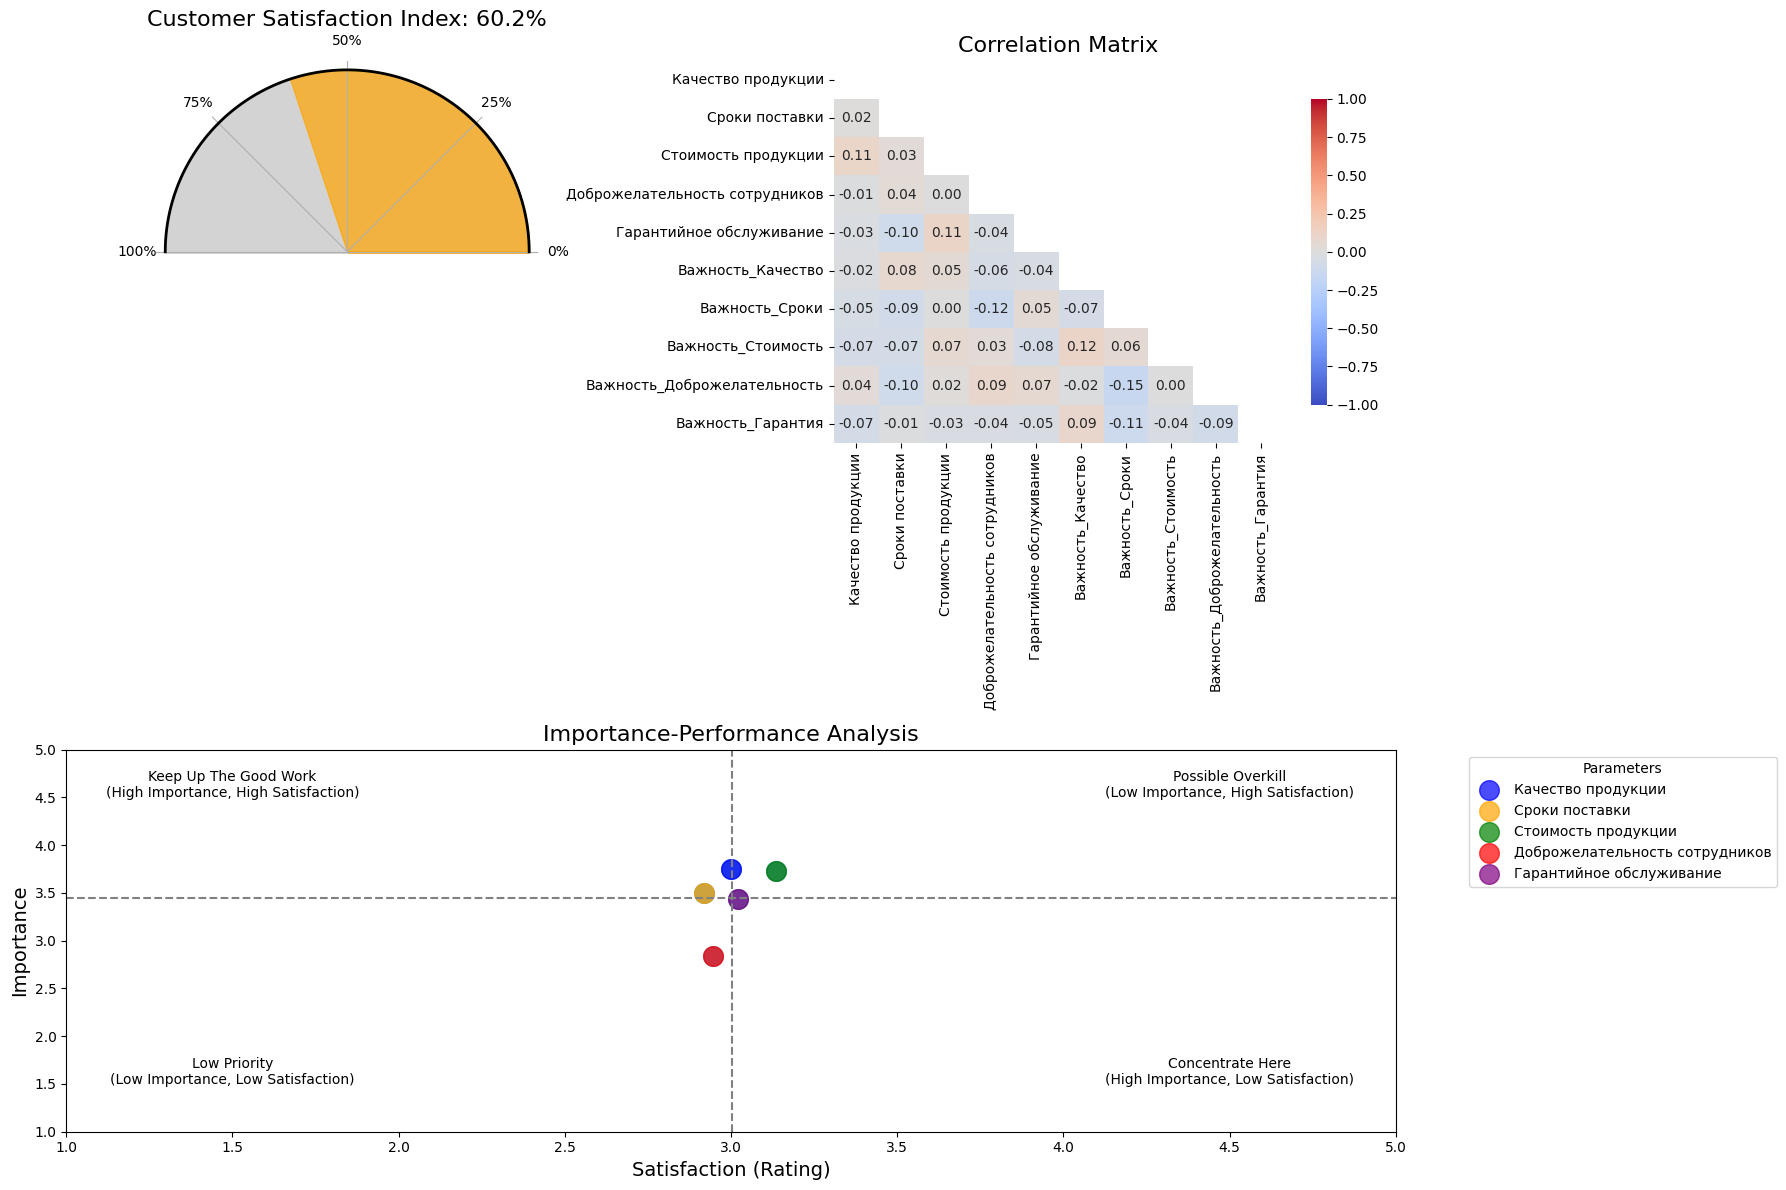


Customer Satisfaction Index: 60.2%

Weighted scores by criteria:
Стоимость продукции: 3.39
Качество продукции: 3.26
Гарантийное обслуживание: 3.01
Сроки поставки: 2.96
Доброжелательность сотрудников: 2.42


In [73]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate CSI (Customer Satisfaction Index)
# Using weighted average of all ratings
total_weighted_score = sum(weighted_scores.values())
max_possible_score = 5 * 5  # maximum rating (5) × number of criteria (5)
csi = (total_weighted_score / max_possible_score) * 100

# Create correlation matrix between ratings and importance
correlation_data = pd.concat([customer_responses, importance_ratings], axis=1)
correlation_matrix = correlation_data.corr()

# Create a figure with 3 subplots
fig = plt.figure(figsize=(18, 12))

# 1. Plot CSI as a gauge chart
ax1 = fig.add_subplot(221, polar=True)
theta = np.linspace(0, 180, 100) / 180 * np.pi
r = np.ones_like(theta)
ax1.plot(theta, r, color='black', lw=2)
ax1.fill_between(theta, 0, r, color='lightgray')

# Color the gauge based on the CSI
csi_norm = csi / 100
csi_theta = np.linspace(0, csi_norm * np.pi, 100)
csi_r = np.ones_like(csi_theta)
if csi < 60:
  color = 'red'
elif csi < 80:
  color = 'orange'
else:
  color = 'green'
ax1.fill_between(csi_theta, 0, csi_r, color=color, alpha=0.7)

ax1.set_rticks([])
ax1.set_thetagrids([0, 45, 90, 135, 180], ['0%', '25%', '50%', '75%', '100%'])
ax1.spines['polar'].set_visible(False)
ax1.set_title(f'Customer Satisfaction Index: {csi:.1f}%', fontsize=16)

# 2. Plot correlation heatmap
ax2 = fig.add_subplot(222)
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
      vmin=-1, vmax=1, ax=ax2, cbar_kws={"shrink": .8})
ax2.set_title('Correlation Matrix', fontsize=16)

# 3. Plot importance vs satisfaction (performance grid)
ax3 = fig.add_subplot(212)
importance_values = [importance_ratings[importance_map[col]].mean() for col in customer_responses.columns]
satisfaction_values = [customer_responses[col].mean() for col in customer_responses.columns]

# Calculate the quadrant lines (using mean of means)
importance_mean = np.mean(importance_values)
satisfaction_mean = np.mean(satisfaction_values)

# Create scatter plot
ax3.scatter(satisfaction_values, importance_values, s=200, alpha=0.7)

# Define distinct colors for each parameter
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Scatter each data point with its assigned color and add a label for the legend
for i, col in enumerate(customer_responses.columns):
  ax3.scatter(satisfaction_values[i], importance_values[i], s=200, 
        color=colors[i], alpha=0.7, label=col)

# Place a legend on the plot describing the color associated with each parameter
ax3.legend(title="Parameters", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Add quadrant lines
ax3.axvline(x=satisfaction_mean, color='gray', linestyle='--')
ax3.axhline(y=importance_mean, color='gray', linestyle='--')

# Label quadrants
ax3.text(1.5, 4.5, 'Keep Up The Good Work\n(High Importance, High Satisfaction)', ha='center', fontsize=10)
ax3.text(4.5, 4.5, 'Possible Overkill\n(Low Importance, High Satisfaction)', ha='center', fontsize=10)
ax3.text(1.5, 1.5, 'Low Priority\n(Low Importance, Low Satisfaction)', ha='center', fontsize=10)
ax3.text(4.5, 1.5, 'Concentrate Here\n(High Importance, Low Satisfaction)', ha='center', fontsize=10)

ax3.set_xlim(1, 5)
ax3.set_ylim(1, 5)
ax3.set_xlabel('Satisfaction (Rating)', fontsize=14)
ax3.set_ylabel('Importance', fontsize=14)
ax3.set_title('Importance-Performance Analysis', fontsize=16)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nCustomer Satisfaction Index: {csi:.1f}%")
print("\nWeighted scores by criteria:")
for criterion, score in sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True):
  print(f"{criterion}: {score:.2f}")# # 

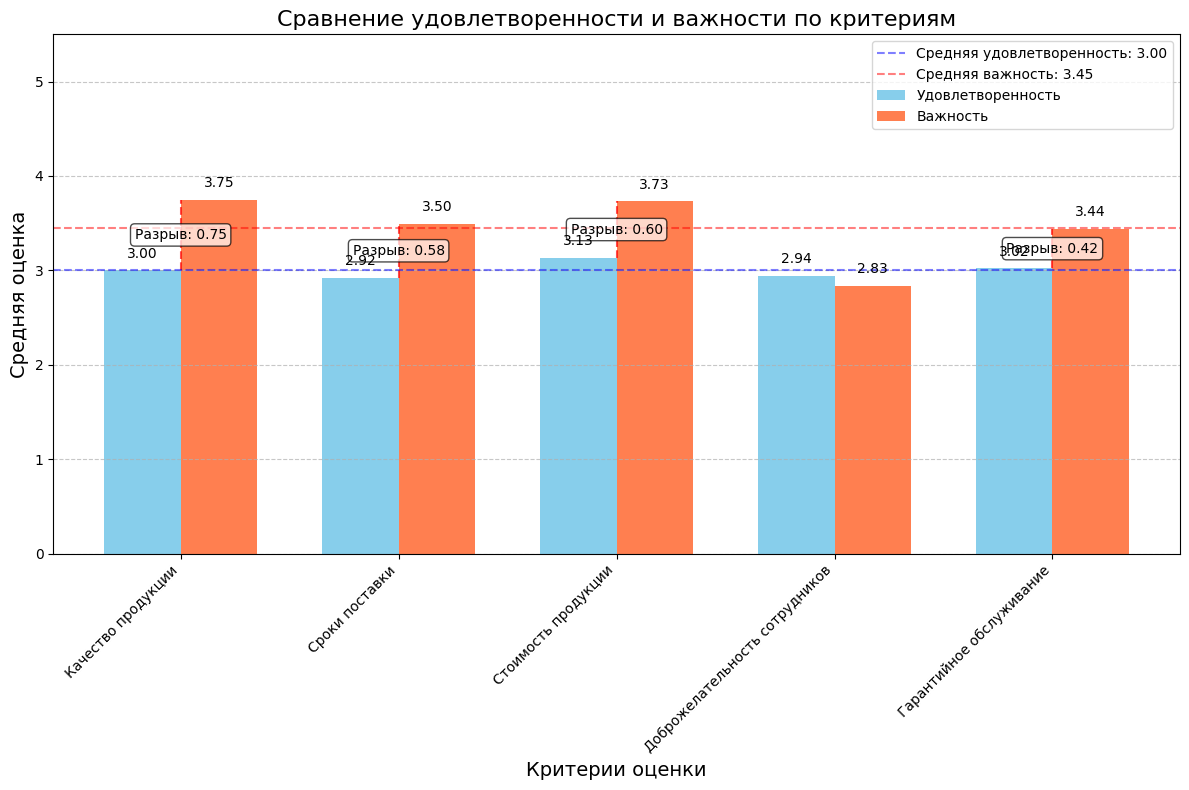

In [74]:
import numpy as np

# Create a comparative bar chart for satisfaction vs importance
import matplotlib.pyplot as plt

# Prepare data
criteria = customer_responses.columns
satisfaction_values = [customer_responses[col].mean() for col in criteria]
importance_columns = [importance_map[col] for col in criteria]
importance_values = [importance_ratings[col].mean() for col in importance_columns]

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bars
bar_width = 0.35
x = np.arange(len(criteria))

# Create bars
satisfaction_bars = ax.bar(x - bar_width/2, satisfaction_values, bar_width, label='Удовлетворенность', color='skyblue')
importance_bars = ax.bar(x + bar_width/2, importance_values, bar_width, label='Важность', color='coral')

# Add gap indicator where importance is higher than satisfaction
for i, (sat, imp) in enumerate(zip(satisfaction_values, importance_values)):
  if imp > sat:
    ax.plot([i, i], [sat, imp], 'r--', alpha=0.7)
    ax.text(i, (sat + imp)/2, f'Разрыв: {imp-sat:.2f}', ha='center', va='center', 
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))

# Add data labels on top of bars
for bar in satisfaction_bars:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
      f'{height:.2f}', ha='center', va='bottom')
      
for bar in importance_bars:
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
      f'{height:.2f}', ha='center', va='bottom')

# Customize plot
ax.set_xlabel('Критерии оценки', fontsize=14)
ax.set_ylabel('Средняя оценка', fontsize=14)
ax.set_title('Сравнение удовлетворенности и важности по критериям', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(criteria, rotation=45, ha='right')
ax.legend()

# Add horizontal line for average values
ax.axhline(y=avg_of_avgs, linestyle='--', color='blue', alpha=0.5, 
       label=f'Средняя удовлетворенность: {avg_of_avgs:.2f}')
ax.axhline(y=avg_of_importance_avgs, linestyle='--', color='red', alpha=0.5, 
       label=f'Средняя важность: {avg_of_importance_avgs:.2f}')
ax.legend()

# Add grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to start from 0 to show true proportions
ax.set_ylim(0, 5.5)

plt.tight_layout()
plt.show()